In [1]:
import sys
import os
from sklearn.model_selection import train_test_split
import pandas as pd

current_dir = os.getcwd()
RNACOREX_path = os.path.abspath(os.path.join(current_dir, '..', 'RNACOREX'))
sys.path.append(RNACOREX_path)

import miRNetClassifier

In [2]:
csv_path = os.path.abspath(os.path.join(current_dir, '..', 'RNACOREX', 'SampleData', 'SampleDataBRCA.csv'))

data_brca = pd.read_csv(csv_path, sep = ',', index_col = 0)

# Select expression data (X) and the class (y)

X = data_brca.drop('classvalues', axis = 1)
y = data_brca['classvalues']

# Split the dataset in train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

INICIALIZANDO MOTORES...


INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


INICIALIZANDO GRAFO...


100%|██████████| 14337075/14337075 [07:07<00:00, 33502.01it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  5468 

INICIALIZANDO GRAFO...


100%|██████████| 25231980/25231980 [12:30<00:00, 33641.52it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  14371 

INICIALIZANDO GRAFO...


100%|██████████| 957040/957040 [00:27<00:00, 34258.21it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  118 


MODEL INITIALIZED
MicroRNAs:  286
Genes:  314
Connections:  4433

CALCULATING FUNCTIONAL MUTUAL INFORMATION...


100%|██████████| 4433/4433 [01:47<00:00, 41.25it/s]


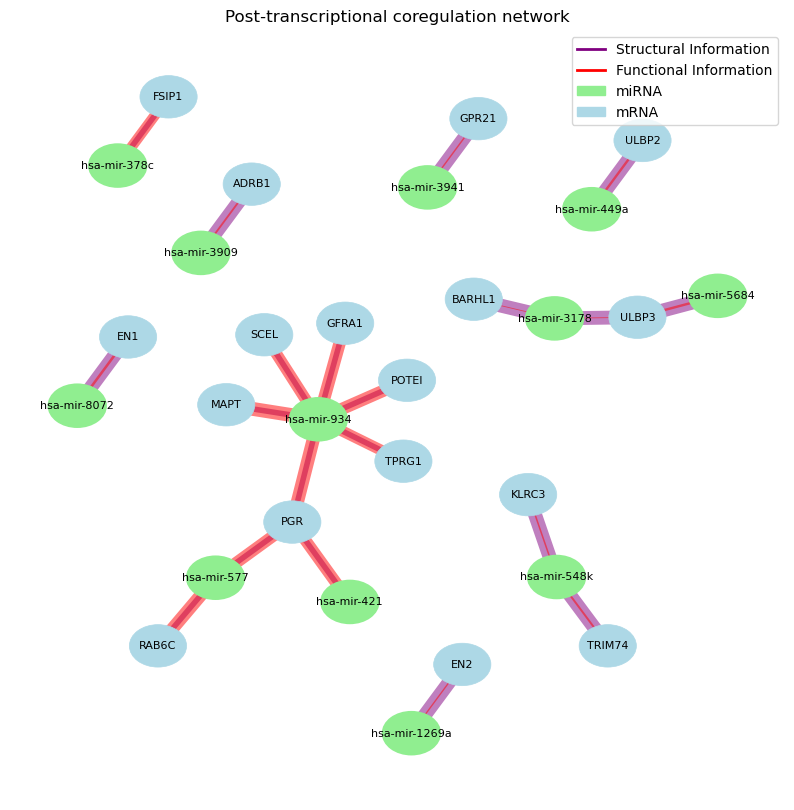

In [3]:
# Initialize estimator with default parameters (precision = 10, n_con = 20)

mrnc = miRNetClassifier.MRNC()

mrnc.fit(X_train, y_train)

mrnc.get_network()

In [5]:
# Show the structural information.

print(mrnc.structural_information_)

# Show the functional information.

print(mrnc.functional_information_)

# The included micros in the CLG model.

print(mrnc.micros_)

# The included genes in the CLG model.

print(mrnc.genes_)

# The ordered list of interactions with their scores.

print(mrnc.connections_)

# The parameters of the model.

print(mrnc.clgc_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['hsa-let-7b', 'hsa-let-7c', 'hsa-let-7d', 'hsa-let-7e', 'hsa-let-7g', 'hsa-let-7i', 'hsa-mir-106a', 'hsa-mir-106b', 'hsa-mir-107', 'hsa-mir-10a', 'hsa-mir-10b', 'hsa-mir-1179', 'hsa-mir-1181', 'hsa-mir-1226', 'hsa-mir-1228', 'hsa-mir-1229', 'hsa-mir-1245a', 'hsa-mir-1248', 'hsa-mir-1251', 'hsa-mir-1255a', 'hsa-mir-1258', 'hsa-mir-1262', 'hsa-mir-1266', 'hsa-mir-1269a', 'hsa-mir-1269b', 'hsa-mir-1270', 'hsa-mir-1271', 'hsa-mir-1275', 'hsa-mir-1276', 'hsa-mir-1277', 'hsa-mir-1284', 'hsa-mir-1287', 'hsa-mir-1288', 'hsa-mir-1291', 'hsa-mir-1292', 'hsa-mir-1294', 'hsa-mir-1295a', 'hsa-mir-1301', 'hsa-mir-1304', 'hsa-mir-1306', 'hsa-mir-130a', 'hsa-mir-130b', 'hsa-mir-132', 'hsa-mir-1

In [7]:
# Fit the model

mrnc.predict(X_test)

# Obtain the parameters of the model

mrnc.predict_proba(X_test)

# Score

mrnc.score(X_test, y_test)

0.5882352941176471

INICIALIZANDO MOTORES...


INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


INICIALIZANDO GRAFO...


100%|██████████| 14337075/14337075 [07:08<00:00, 33456.29it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  5468 

INICIALIZANDO GRAFO...


100%|██████████| 25231980/25231980 [13:05<00:00, 32137.35it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  14371 

INICIALIZANDO GRAFO...


100%|██████████| 957040/957040 [00:27<00:00, 35078.83it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  118 


MODEL INITIALIZED
MicroRNAs:  286
Genes:  314
Connections:  4433

CALCULATING FUNCTIONAL MUTUAL INFORMATION...


100%|██████████| 4433/4433 [01:44<00:00, 42.37it/s]


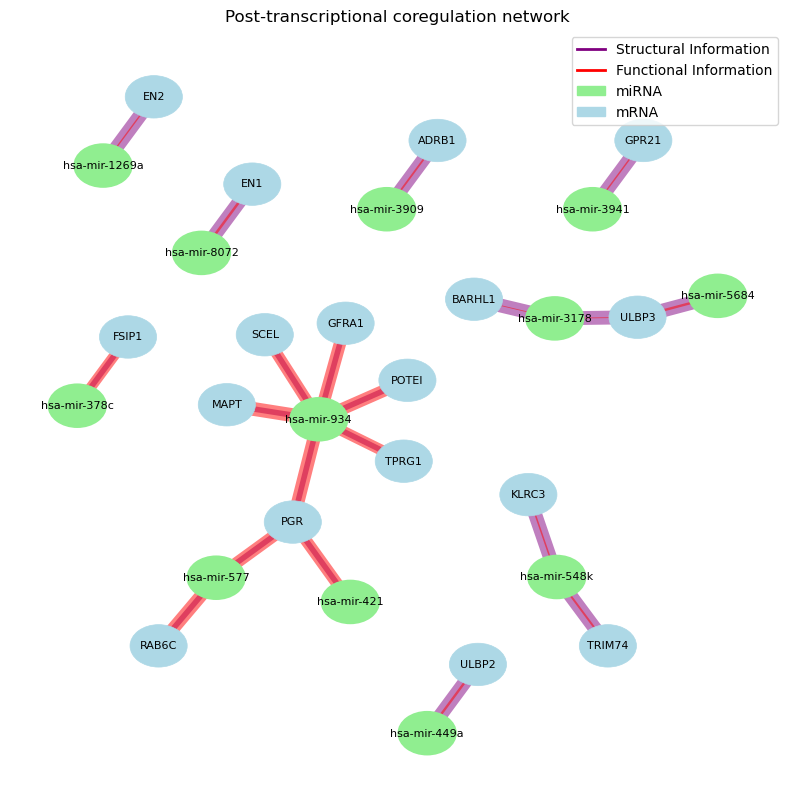

In [3]:
# Initialize estimator with default parameters (precision = 10, n_con = 20)

mrnc = miRNetClassifier.MRNC()

# Initialize model and calculate structural information

mrnc.initialize_model(X_train, y_train)

# Calculate functional information. compute_functional() allows to use different X_train and y_train than the ones used for initializing the model.
# This permits, for example, fitting models with different train and test sets without having to initialize the model again.
# The used X_train and y_train sets should have the same variables (microRNA and mRNA) as the ones used in initialize_model().

mrnc.compute_functional()

# Fit the model

mrnc.fit_only()

# Get the network

mrnc.get_network()

In [4]:
# Search for best structure with test set.

mrnc.structure_search(X_train, y_train, X_test, y_test, 100)

# Search for best structure with test set.

mrnc.structure_search(X_train, y_train, max_models = 100)

# Search for best structure with test set.

mrnc.structure_search(X_test = X_test, y_test = y_test, max_models = 100)

# Search for best structure with only train set.

mrnc.structure_search(max_models = 100)

print(mrnc.structure_metrics_)

GENERANDO DAGS...
SI TEST


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


GENERANDO DAGS...
NO TEST


100%|██████████| 100/100 [00:15<00:00,  6.31it/s]


GENERANDO DAGS...
SI TEST


100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


GENERANDO DAGS...
NO TEST


100%|██████████| 100/100 [00:15<00:00,  6.27it/s]

    Accuracy  Log Likelihood           BIC       AUC  Sensitivity  Specificity
0   0.560510     -531.701860   -535.514170  0.590260     0.649351       0.4750
1   0.566879    -1191.919692  -1206.475783  0.625812     0.688312       0.4500
2   0.624204    -1416.698876  -1444.471148  0.659578     0.727273       0.5250
3   0.624204    -1810.658546  -1846.657884  0.672727     0.675325       0.5750
4   0.700637    -2172.282507  -2223.917284  0.731981     0.740260       0.6625
..       ...             ...           ...       ...          ...          ...
95  0.802548   -25844.471545 -27234.275875  0.871916     0.844156       0.7625
96  0.796178   -26230.125511 -27636.765759  0.870455     0.831169       0.7625
97  0.796178   -26558.997158 -27982.502968  0.868994     0.831169       0.7625
98  0.808917   -27099.725832 -28552.387110  0.872890     0.857143       0.7625
99  0.808917   -27096.548249 -28553.872966  0.873701     0.857143       0.7625

[100 rows x 6 columns]
